# LIBRARY

In [424]:
# Library
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# MEMUAT DATASET

In [425]:
# Memuat dataset kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv("/kaggle/input/titanic/train.csv")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# MEMBACA DATASET CSV

In [426]:
# Membaca file CSV
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [427]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# PREPROCESSING DATA

### CEK MISSING VALUES

In [428]:
# Melihat missing values
df.describe(include='all')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### MENGISI MISSING VALUES

In [429]:
# Mengisi nilai misiing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(['Cabin','Name', 'Ticket'], axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

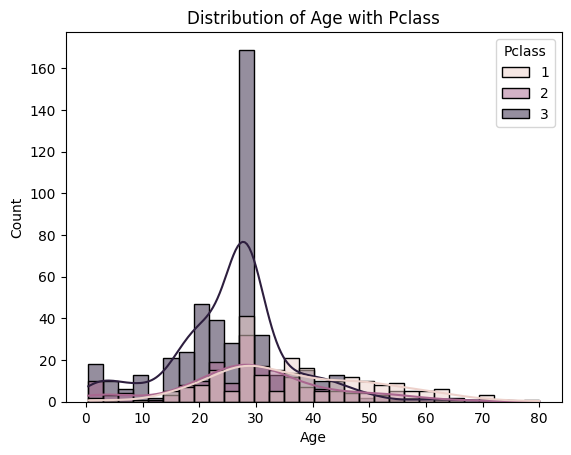

In [430]:
sns.histplot(data=df, x='Age', hue='Pclass', kde=True)
plt.title('Distribution of Age with Pclass')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


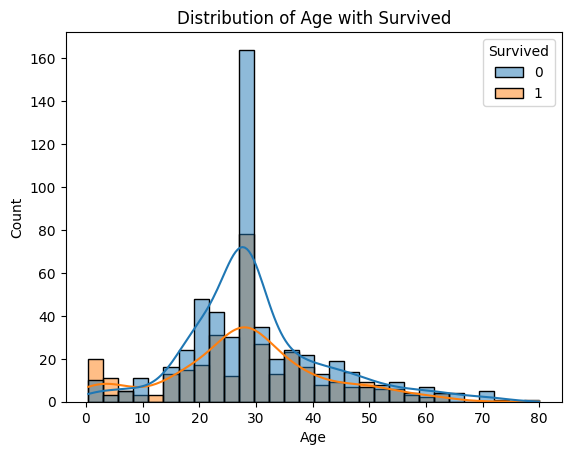

In [431]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Distribution of Age with Survived')
plt.show()

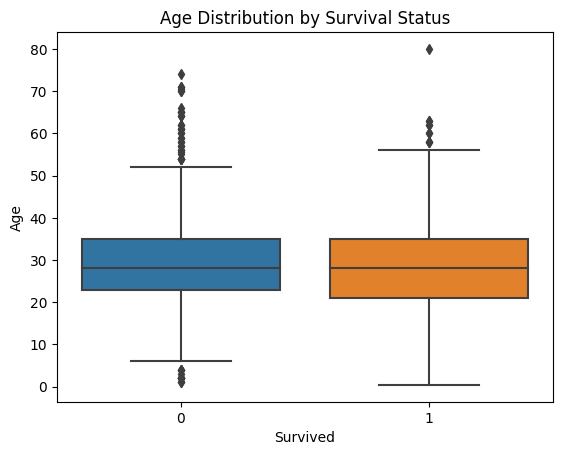

In [432]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


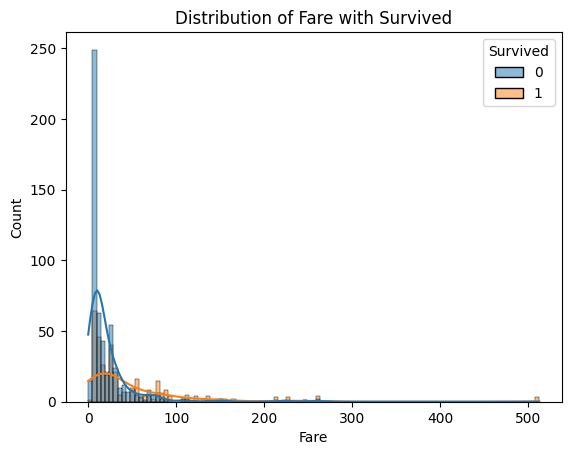

In [433]:
#Analisis Fare
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Distribution of Fare with Survived')
plt.show()

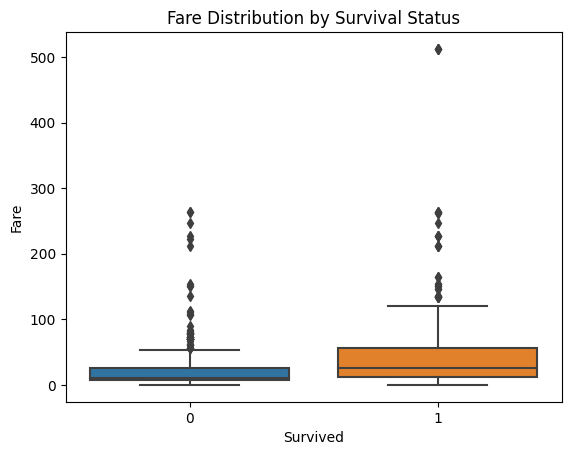

In [434]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival Status')
plt.show()

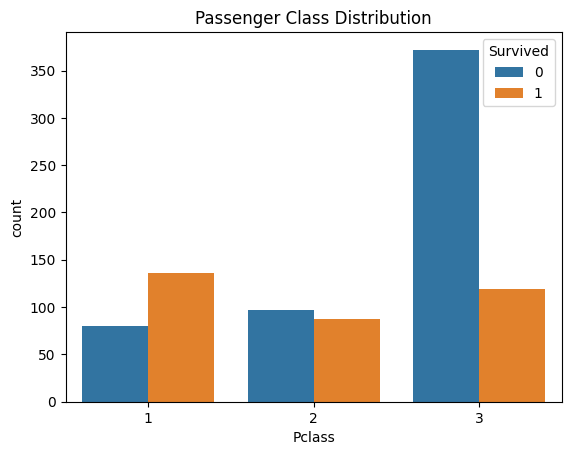

In [435]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Passenger Class Distribution')
plt.show()

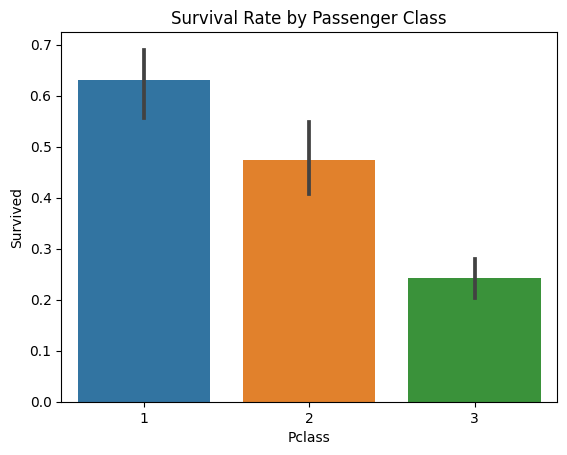

In [436]:
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

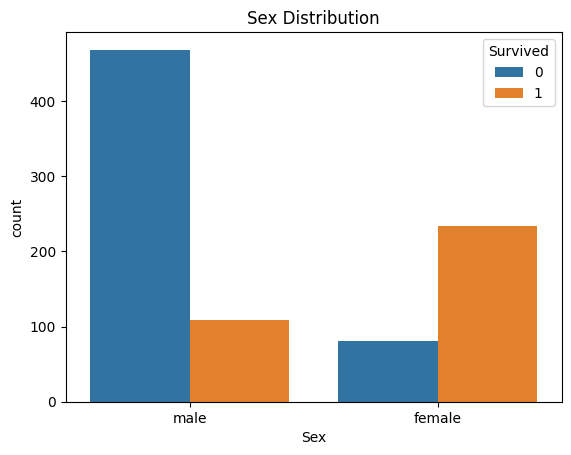

In [437]:
# Count plot for categorical features
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sex Distribution')
plt.show()

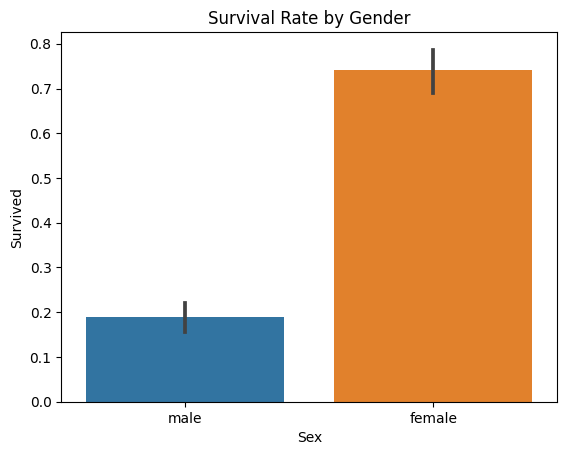

In [438]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

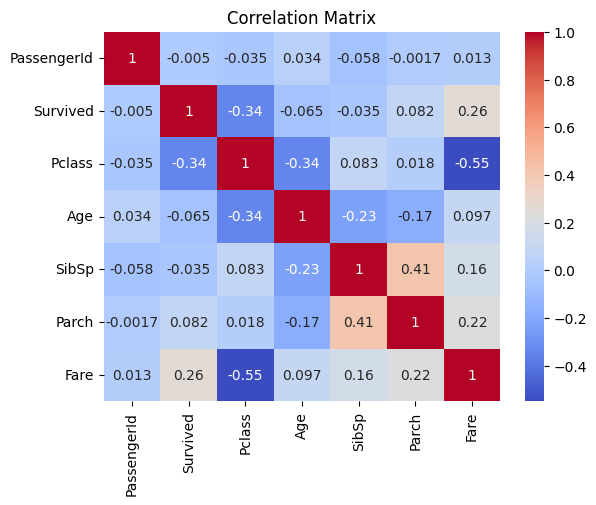

In [439]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### LABEL ENCODING UNTUK MENGUBAH DATA KATEGORIK MENJADI NUMERIK

In [440]:
# Mengubah data bertipe kategorik ke data bertipe numerik
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
print(df[['Sex', 'Embarked']].head())
df

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


# PEMILIHAN FITUR

In [441]:
# Pemilihan fitur yang akan digunakan untuk data train dan test 
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


# MEMISAHKAN DATASET MENJADI TRAIN DAN TEST UNUTK DILATIH DAN DI UJI

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [443]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [444]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [445]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [446]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# MODEL KLASIFIKASI

### RANDOM FOREST

In [447]:
# Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [448]:
y_pred = model.predict(X_test)

In [449]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## Confusion Matrix Random Forest

In [450]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[89 16]
 [17 57]]


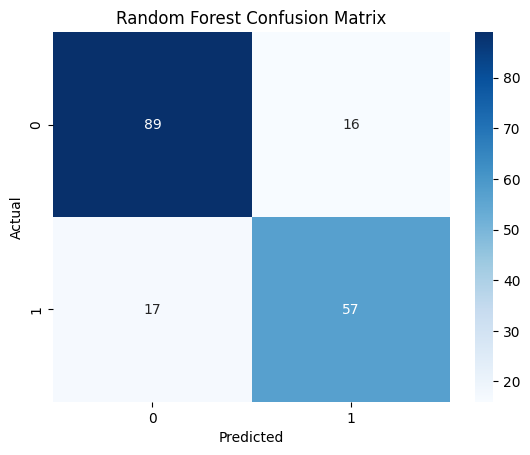

In [474]:
# Visualisasi Confusion Matrix pada model Random Forest
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Accuracy, Precision, Recall, F1 Score Random Forest

In [452]:
# Menghitung accuracy, precesion, Recall, F1 Score pada model Random Forest
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.78
Recall: 0.77
F1 Score: 0.78


In [453]:
# Memahami dan menginterpretasi model machine learning secara umum
feature_importance = model.feature_importances_
feature_names = X_train.columns

In [454]:
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
5,Fare,0.279431
1,Sex,0.257308
2,Age,0.255248
0,Pclass,0.079773
3,SibSp,0.054898
4,Parch,0.038079
6,Embarked,0.035264


# Perbandingan Accuracy, Precision, Recall, F1 Score dari beberapa model Classification

# Logistic Regression

In [455]:
# Model Logistic Regression
log_model = LogisticRegression(max_iter=100, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [456]:
y_pred_log = log_model.predict(X_test)

In [457]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_log
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


## Confusion Matrix Logistic Regression

In [458]:
# Confusion Matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log)

Logistic Regression Confusion Matrix:
[[90 15]
 [19 55]]


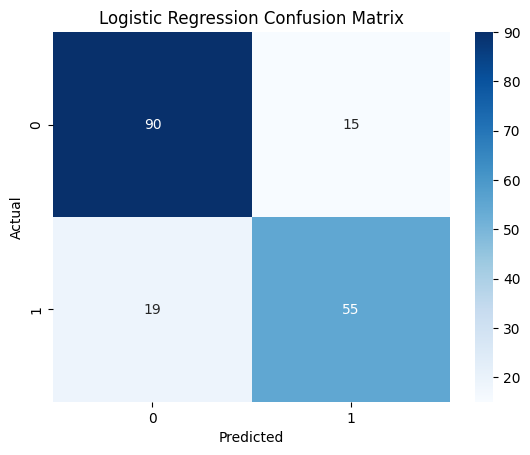

In [459]:
# Visualisasi Confusion Matrix pada model Logistic Regression
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Accuracy, Precision, Recall, F1 Score Log Regression

In [460]:
### Accuracy, Precision, Recall, F1 Score Model Log Regression
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Accuracy: {accuracy_log:.2f}")
print(f"Precision: {precision_log:.2f}")
print(f"Recall: {recall_log:.2f}")
print(f"F1 Score: {f1_log:.2f}")

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1 Score: 0.76


## SVM 

In [461]:
svm_model = SVC(C=1.0, kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [462]:
y_pred_svm = svm_model.predict(X_test)

In [463]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_svm
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,1
84,1,1


## Confusion Matrix SVM

In [464]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(conf_matrix_svm)

SVM Confusion Matrix:
[[88 17]
 [22 52]]


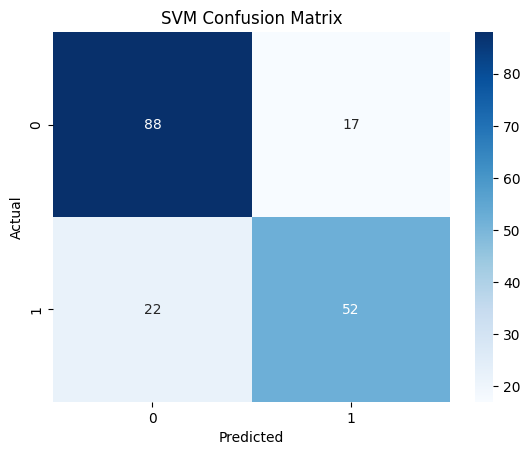

In [465]:
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

### Accuracy, Precision, Recall, F1 Score SVM

In [466]:
# Accuracy, Precision, Recall, F1 Score Model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")

Accuracy: 0.78
Precision: 0.75
Recall: 0.70
F1 Score: 0.73


## KNN

In [467]:
knn_model = KNeighborsClassifier(n_neighbors=100)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [468]:
y_pred_knn = knn_model.predict(X_test)

In [469]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_knn
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,0
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,0


## Confusion Matrix KNN

In [470]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)

KNN Confusion Matrix:
[[100   5]
 [ 56  18]]


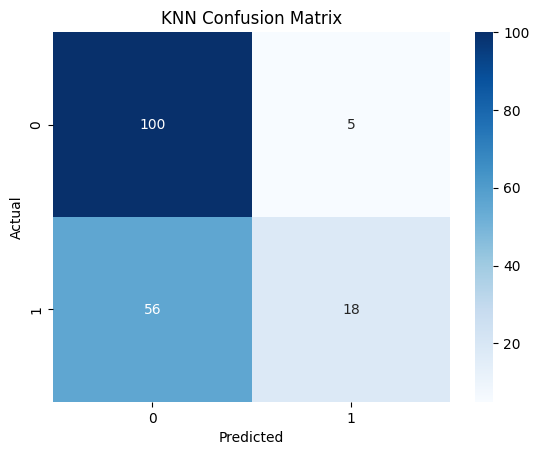

In [471]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

### Accuracy, Precision, Recall, F1 Score KNN

In [472]:
# Accuracy, Precision, Recall, F1 Score Model KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")

Accuracy: 0.66
Precision: 0.78
Recall: 0.24
F1 Score: 0.37


# MEMBANDINGKAN SEMUA MODEL KLASIFIKASI

                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.815642   0.780822  0.770270  0.775510
1  Logistic Regression  0.810056   0.785714  0.743243  0.763889
2                  SVM  0.782123   0.753623  0.702703  0.727273
3                  KNN  0.659218   0.782609  0.243243  0.371134


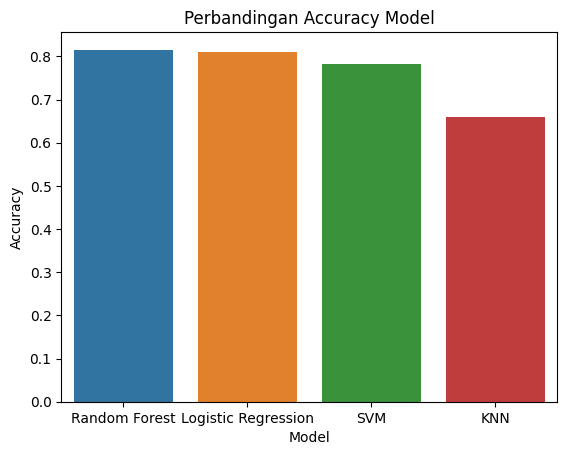

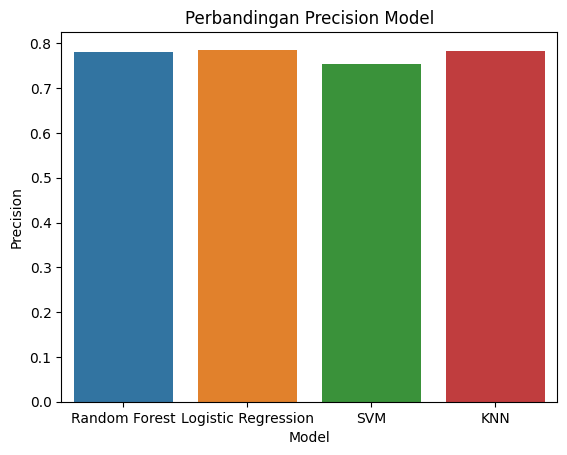

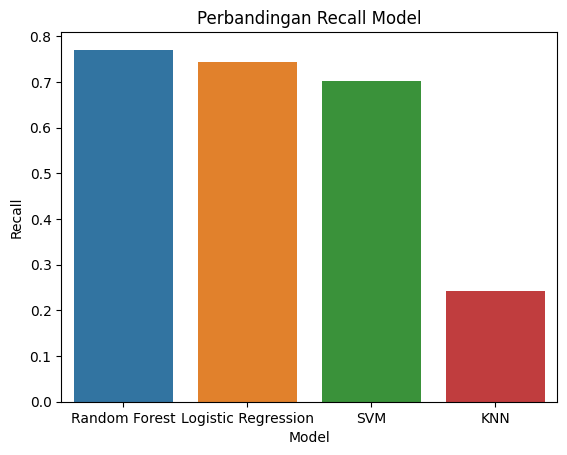

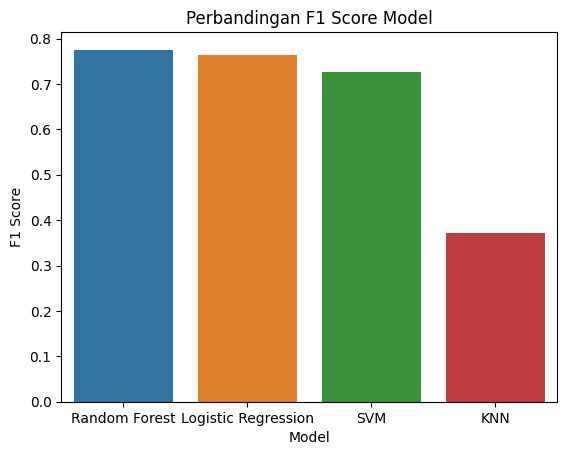

In [475]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVM', 'KNN'],
    'Accuracy': [accuracy, accuracy_log, accuracy_svm, accuracy_knn],
    'Precision': [precision, precision_log, precision_svm, precision_knn],
    'Recall': [recall, recall_log, recall_svm, recall_knn],
    'F1 Score': [f1, f1_log, f1_svm, f1_knn]
}).sort_values(by='Accuracy', ascending=False)

print(models)

sns.barplot(x='Model', y='Accuracy', data=models)
plt.title('Perbandingan Accuracy Model')
plt.show()

sns.barplot(x='Model', y='Precision', data=models)
plt.title('Perbandingan Precision Model')
plt.show()

sns.barplot(x='Model', y='Recall', data=models)
plt.title('Perbandingan Recall Model')
plt.show()

sns.barplot(x='Model', y='F1 Score', data=models)
plt.title('Perbandingan F1 Score Model')
plt.show()